In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [363]:
original_data = pd.read_csv('data_tfidf.csv')

In [364]:
data = original_data.copy()

In [365]:
from sklearn.feature_extraction.text import TfidfVectorizer
data['type_of_view']

0                                           beach, lake
1     beauty of the coast of Hong Kong, Sai Wan beac...
2                                        forests, views
3                                    views, wildflowers
4                                     forests and views
                            ...                        
82            Pyramid Hill, Ma On Shan, The Hunch Backs
83                Sweet Gum Woods, Thousand-Island Lake
84                                    Tai Tam Reservoir
85                        Views and tourist attractions
86    mountain peaks, traditional villages, coastal ...
Name: type_of_view, Length: 87, dtype: object

In [366]:
tf = TfidfVectorizer()
type_of_view_tf = tf.fit_transform(data['type_of_view'])

In [367]:
type_of_view_tf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 675 stored elements and shape (87, 361)>

In [368]:
tf.vocabulary_

{'beach': 19,
 'lake': 143,
 'beauty': 22,
 'of': 196,
 'the': 299,
 'coast': 53,
 'hong': 125,
 'kong': 140,
 'sai': 241,
 'wan': 339,
 'azure': 13,
 'sky': 265,
 'and': 6,
 'crystal': 65,
 'clear': 51,
 'seawater': 247,
 'stargazing': 275,
 'area': 7,
 'tai': 288,
 'long': 157,
 'ham': 109,
 'tin': 303,
 'chek': 42,
 'keng': 139,
 'pier': 209,
 'shingle': 258,
 'beaches': 20,
 'mangroves': 166,
 'forests': 92,
 'views': 332,
 'wildflowers': 348,
 'lakes': 144,
 'lead': 149,
 'mine': 170,
 'pass': 201,
 'grassy': 103,
 'hill': 117,
 'needle': 186,
 'shing': 257,
 'mun': 178,
 'reservoir': 227,
 'historical': 120,
 'caves': 39,
 'mo': 172,
 'shan': 252,
 'tea': 295,
 'cultivation': 66,
 'fields': 86,
 'new': 189,
 'territories': 298,
 'tsing': 317,
 'ma': 162,
 'bridge': 31,
 'shenzhen': 255,
 'mist': 171,
 'enveloped': 80,
 'scenery': 243,
 'observation': 194,
 'deck': 70,
 'overlooking': 198,
 'tsuen': 318,
 'stonecutters': 280,
 'ho': 122,
 'pui': 219,
 'irrigation': 133,
 'native':

In [369]:
all_features_name = tf.get_feature_names_out()
for word in all_features_name:
    indx = tf.vocabulary_.get(word)
    print(f"{word} {tf.idf_[indx]}") # Print the idf score (Weighting) of all words

360 4.7841896339182615
aberdeen 4.7841896339182615
acacia 4.7841896339182615
admire 4.7841896339182615
aguilar 4.7841896339182615
ancient 4.378724525810097
and 2.386294361119891
area 4.7841896339182615
areas 4.7841896339182615
as 4.7841896339182615
attractions 4.7841896339182615
awe 4.7841896339182615
azalea 4.7841896339182615
azure 4.378724525810097
backdrop 4.7841896339182615
backs 4.7841896339182615
basalt 4.7841896339182615
bay 3.6855773452501515
bays 4.7841896339182615
beach 3.531426665422893
beaches 3.2801122371419873
beacon 4.7841896339182615
beauty 4.378724525810097
bell 4.7841896339182615
beneath 4.7841896339182615
big 4.7841896339182615
biodiversity 4.7841896339182615
birds 4.7841896339182615
blockhouse 4.7841896339182615
blooming 4.378724525810097
box 4.7841896339182615
bridge 3.8678989020441064
bridges 4.7841896339182615
brisbane 4.7841896339182615
buddha 4.7841896339182615
by 4.7841896339182615
cairn 4.7841896339182615
camp 4.7841896339182615
can 4.7841896339182615
caves 4

In [370]:
type_of_view_tf.toarray()[:1] # tf-idf score of 'beach' is 0.653

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.65343476,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [371]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data.select_dtypes(np.number))
data_normalized

array([[ 0.35359638,  0.48765566,  0.82273303, ..., -0.31822291,
         1.89181061, -0.4       ],
       [ 0.67495987,  2.07463363,  1.53950323, ..., -0.31822291,
         1.89181061, -0.4       ],
       [ 0.30927038,  1.28114464,  0.82273303, ..., -0.31822291,
         1.89181061, -0.4       ],
       ...,
       [ 0.2031796 ,  0.        ,  0.46434794, ..., -0.31822291,
        -0.52859414, -0.4       ],
       [ 4.71970727,  0.        ,  1.18111813, ..., -0.31822291,
        -0.52859414, -0.4       ],
       [ 6.93600722,  0.        ,  0.46434794, ..., -0.31822291,
        -0.52859414, -0.4       ]])

In [372]:
data_normalized

array([[ 0.35359638,  0.48765566,  0.82273303, ..., -0.31822291,
         1.89181061, -0.4       ],
       [ 0.67495987,  2.07463363,  1.53950323, ..., -0.31822291,
         1.89181061, -0.4       ],
       [ 0.30927038,  1.28114464,  0.82273303, ..., -0.31822291,
         1.89181061, -0.4       ],
       ...,
       [ 0.2031796 ,  0.        ,  0.46434794, ..., -0.31822291,
        -0.52859414, -0.4       ],
       [ 4.71970727,  0.        ,  1.18111813, ..., -0.31822291,
        -0.52859414, -0.4       ],
       [ 6.93600722,  0.        ,  0.46434794, ..., -0.31822291,
        -0.52859414, -0.4       ]])

In [373]:
from scipy.sparse import csr_matrix
data_normalized_sparse = csr_matrix(data_normalized)

In [374]:
from scipy.sparse import hstack
data_tf = hstack([type_of_view_tf, data_normalized_sparse])

In [375]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=42).fit(data_tf)
labels = kmeans.labels_


In [376]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_tf, labels)
silhouette_avg

np.float64(0.34070366231420357)

In [377]:
k_values = range(2, 40)  # Thử k từ 2 đến 9
silhouette_scores = []
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_tf)
    score = silhouette_score(data_tf, kmeans.labels_)
    silhouette_scores.append(score)
    inertia.append(kmeans.inertia_)


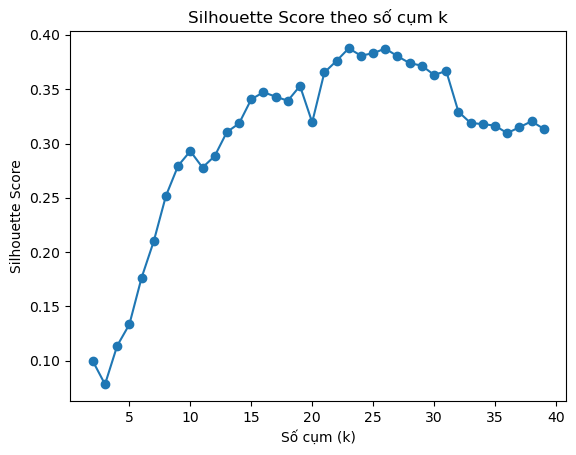

In [378]:
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score theo số cụm k')
plt.show()

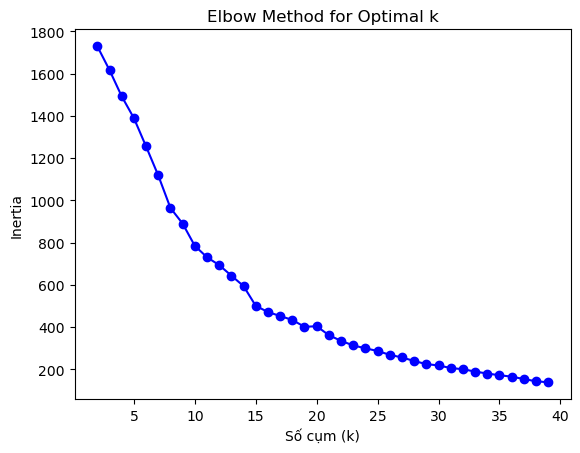

In [379]:
plt.plot(k_values, inertia, 'bo-')  # 'bo-' là màu xanh, dấu tròn nối liền
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

C:\Users\tchoang\AppData\Local\Temp\ipykernel_2428\2270114863.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


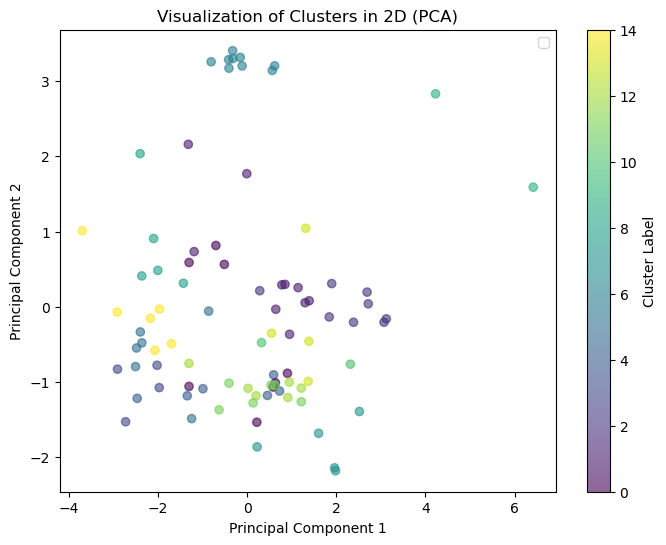

In [380]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_tf)

# Vẽ scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
# Thêm centroid (tùy chọn)
#centroids = kmeans.cluster_centers_
#centroids_pca = pca.transform(scaler.transform(centroids))
#plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')

# Thêm tiêu đề và nhãn
plt.title('Visualization of Clusters in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [381]:
from sklearn.cluster import DBSCAN

In [382]:
dbscan = DBSCAN(eps = 5, min_samples=5)

In [383]:
labelss = dbscan.fit_predict(data_tf)

In [384]:
np.unique(labelss)

array([-1,  0,  1])

C:\Users\tchoang\AppData\Local\Temp\ipykernel_2428\11361660.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


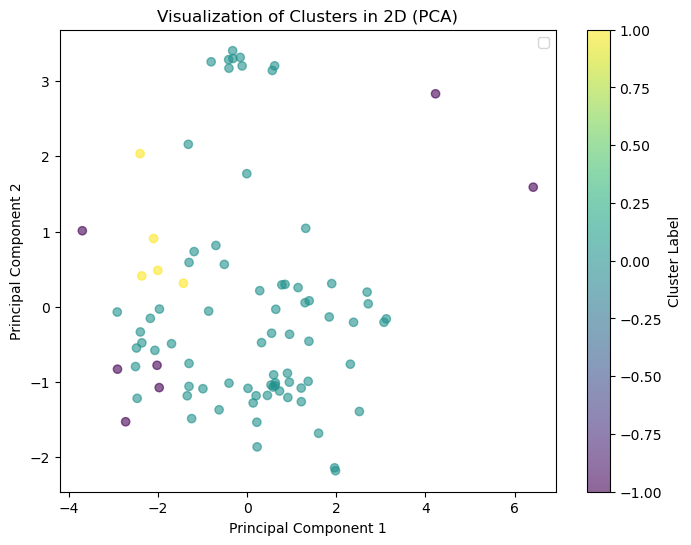

In [385]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_tf)

# Vẽ scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labelss, cmap='viridis', alpha=0.6)
# Thêm centroid (tùy chọn)
#centroids = kmeans.cluster_centers_
#centroids_pca = pca.transform(scaler.transform(centroids))
#plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')

# Thêm tiêu đề và nhãn
plt.title('Visualization of Clusters in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [386]:
plt.scatter(data_tf.iloc[labelss==-1,0], data_tf[labelss==-1,1], s= 10, c="black")
plt.scatter(data_tf.iloc[labelss==0,0], data_tf[labelss==-1,1], s= 10, c="green")
plt.scatter(data_tf.iloc[labelss==-1,0], data_tf[labelss==-1,1], s= 10, c="blue")
plt.show()

AttributeError: 'csr_matrix' object has no attribute 'iloc'

In [ ]:

'''
label/one-hot?/binary for categorical features
Test TF-IDF, BoW, and Word embeddings for type_of_view, evaluate with K-means using Silhouette Score, select TF-IDF if best.
Process type, region (one-hot encoding), difficulty (Label Encoding), normalize with StandardScaler.
Use best type to test K-means, DBSCAN, GMM, Hierarchical Clustering; compare Silhouette Scores + interpretability <=> comparable table? -> explain
Visualize best clusters with scatter plot (PCA) and word cloud.
Document: Describe experiments, comparison table, explain cluster meanings (trail recommendations).'''

'\nlabel/one-hot?/binary for categorical features\nTest TF-IDF, BoW, and Word embeddings for type_of_view, evaluate with K-means using Silhouette Score, select TF-IDF if best.\nProcess type, region (one-hot encoding), difficulty (Label Encoding), normalize with StandardScaler.\nUse best type to test K-means, DBSCAN, GMM, Hierarchical Clustering; compare Silhouette Scores + interpretability <=> comparable table? -> explain\nVisualize best clusters with scatter plot (PCA) and word cloud.\nDocument: Describe experiments, comparison table, explain cluster meanings (trail recommendations).'